Natural Language Processing with Disaster Tweets

Description
* Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. 
* Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies)


What am I trying to predict?
- You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

What should I expect the data format to be?
- Each sample in the train and test set has the following information:

    * The text of a tweet
    * A keyword from that tweet (although this may be blank!)
    * The location the tweet was sent from (may also be blank)

EDA
- Data Loading
- Visualization




Importing libraries

In [20]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm
import random
import sys
from IPython.display import Image

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [6]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
# but we want only the text and the target

df_train = df_train[['text', 'target']]

In [8]:
df_train

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


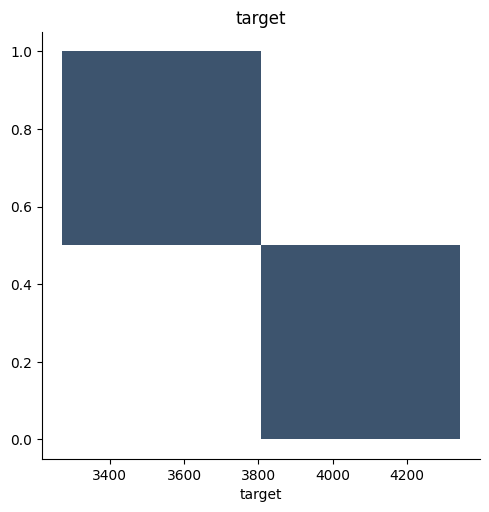

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

locations_vc = df_train["target"].value_counts()
sns.displot(y=locations_vc.index, x=locations_vc)
plt.title("target")
plt.show()

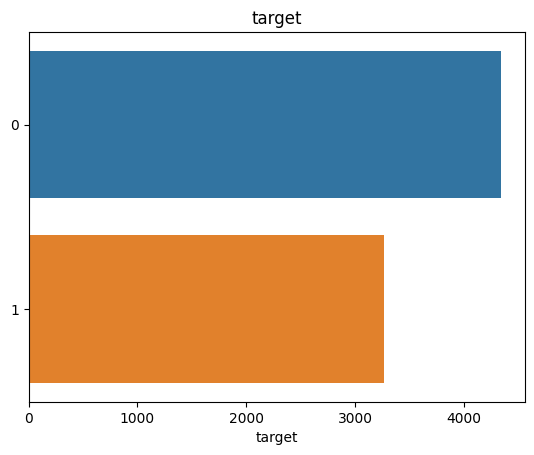

In [12]:


locations_vc = df_train["target"].value_counts()
sns.barplot(y=locations_vc.index, x=locations_vc, orient='h')
plt.title("target")
plt.show()

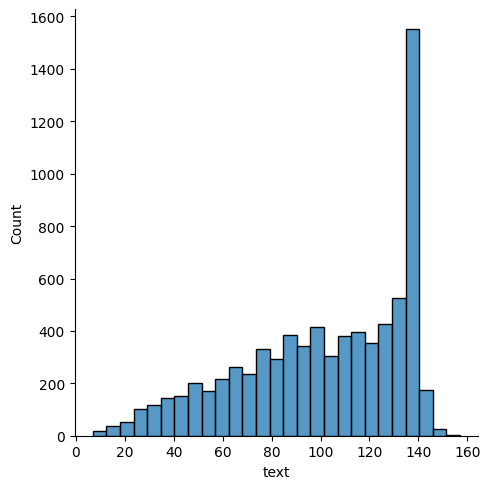

In [18]:
sns.displot(df_train['text'].str.len())


C:\Users\bharadw3\AppData\Local\Temp\ipykernel_1916\2373714568.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train[df_train['target'] == 1]['text'].str.len(), shade=True, color='red')
C:\Users\bharadw3\AppData\Local\Temp\ipykernel_1916\2373714568.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train[df_train['target'] == 0]['text'].str.len(), shade=True, color= 'blue')


<AxesSubplot: xlabel='text', ylabel='Density'>

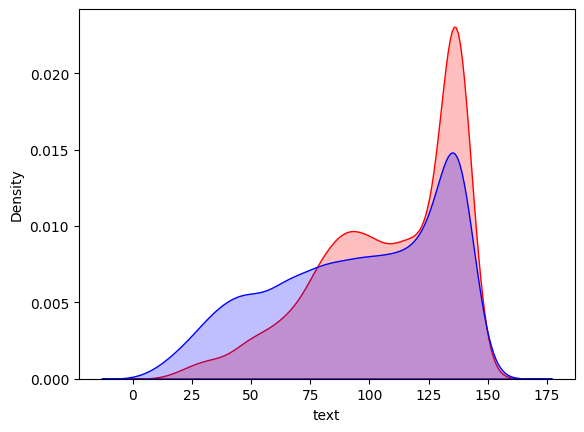

In [19]:
sns.kdeplot(df_train[df_train['target'] == 1]['text'].str.len(), shade=True, color='red')
sns.kdeplot(df_train[df_train['target'] == 0]['text'].str.len(), shade=True, color= 'blue')

Preprocessing
- Text Cleaning
- Feature Preparation
- TTS